In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv


In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
train = pd.read_csv('../input/Kannada-MNIST/train.csv')
test = pd.read_csv('../input/Kannada-MNIST/test.csv')
submission = pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')

In [4]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']
X_submit = test.drop('id', axis=1)

In [5]:
X_train /= 255.0
X_submit /= 255.0

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_submit = X_submit.values.reshape(-1, 28, 28, 1)

In [6]:
Y_train = to_categorical(Y_train)

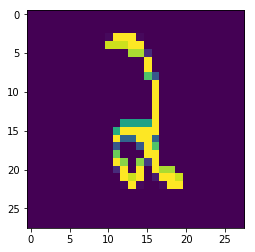

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)
plt.imshow(X_train[0][:,:,0])

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [9]:
print(X_train.shape)

(48000, 28, 28, 1)


In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=((28, 28, 1)) ))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [11]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [12]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
epochs=32 #change this to 30 if you need to get better score
batch_size=32

In [17]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                            )

Epoch 1/32
 - 20s - loss: 0.0945 - accuracy: 0.9737 - val_loss: 0.0263 - val_accuracy: 0.9937
Epoch 2/32
 - 20s - loss: 0.0843 - accuracy: 0.9762 - val_loss: 0.0221 - val_accuracy: 0.9938
Epoch 3/32
 - 21s - loss: 0.0707 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 0.9945
Epoch 4/32
 - 20s - loss: 0.0726 - accuracy: 0.9798 - val_loss: 0.0184 - val_accuracy: 0.9946
Epoch 5/32
 - 20s - loss: 0.0694 - accuracy: 0.9804 - val_loss: 0.0196 - val_accuracy: 0.9942
Epoch 6/32
 - 21s - loss: 0.0619 - accuracy: 0.9820 - val_loss: 0.0204 - val_accuracy: 0.9942
Epoch 7/32
 - 20s - loss: 0.0602 - accuracy: 0.9827 - val_loss: 0.0238 - val_accuracy: 0.9942
Epoch 8/32
 - 20s - loss: 0.0588 - accuracy: 0.9840 - val_loss: 0.0163 - val_accuracy: 0.9957
Epoch 9/32
 - 21s - loss: 0.0604 - accuracy: 0.9829 - val_loss: 0.0302 - val_accuracy: 0.9931
Epoch 10/32
 - 20s - loss: 0.0592 - accuracy: 0.9837 - val_loss: 0.0177 - val_accuracy: 0.9953
Epoch 11/32
 - 20s - loss: 0.0557 - accuracy: 0.9847 - val_

Text(0.5, 1.0, 'Accuracy')

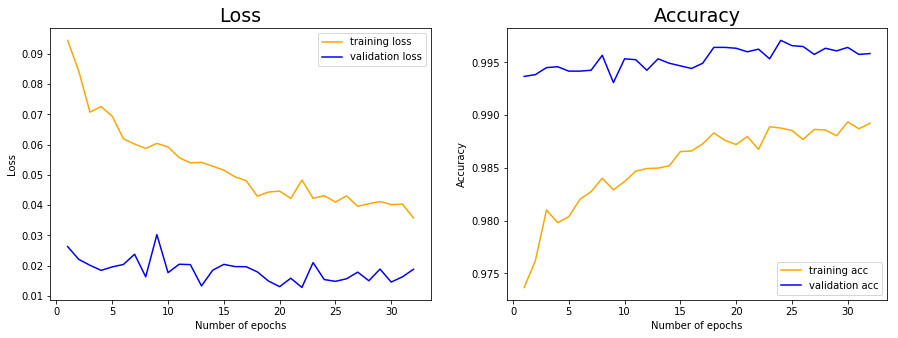

In [38]:
fig,ax= plt.subplots(1,2, figsize=(15, 5))
fig.set
x=np.arange(1, epochs+1)

ax[0].plot(x,history.history['loss'],color='orange')
ax[0].plot(x,history.history['val_loss'],color='blue')
ax[1].plot(x,history.history['accuracy'],color='orange')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['training loss','validation loss'])
ax[1].legend(['training acc','validation acc'])
ax[0].set_xlabel('Number of epochs')
ax[0].set_ylabel('Loss')

ax[1].set_xlabel('Number of epochs')
ax[1].set_ylabel('Accuracy')

ax[0].set_title('Loss', size=19)
ax[1].set_title('Accuracy', size=19)

In [44]:
import numpy as np

y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(Y_test,axis=1)
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
conf

,0,1,2,3,4,5,6,7,8,9
0,1160,8,0,0,0,0,1,0,1,0
1,3,1182,0,0,0,0,0,0,0,0
2,1,0,1226,2,0,0,0,0,0,0
3,0,0,0,1242,1,0,0,0,0,0
4,0,0,0,0,1197,1,0,0,0,0
5,0,0,0,0,1,1176,0,0,0,0
6,0,0,0,0,0,0,1180,1,0,12
7,0,1,0,2,0,0,10,1149,0,0
8,0,0,0,0,0,0,0,0,1219,1
9,1,0,0,0,0,0,3,0,0,1219


In [45]:
y_submit = model.predict(X_submit)
y_submit = np.argmax(y_submit, axis=1)

In [47]:
submission['label'] = y_submit
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [48]:
submission.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv')